In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Import Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


# Data Cleaning

In [4]:
check_null = df_train.isnull()

for i in check_null.columns.tolist():
    print(check_null[i].value_counts())
    print('')

False    54937
Name: Id, dtype: int64

False    54937
Name: Make, dtype: int64

False    54398
True       539
Name: Vehicle Class, dtype: int64

False    53544
True      1393
Name: Engine Size(L), dtype: int64

False    53739
True      1198
Name: Cylinders, dtype: int64

False    54527
True       410
Name: Transmission, dtype: int64

False    54391
True       546
Name: Fuel Type, dtype: int64

False    53369
True      1568
Name: Fuel Consumption City, dtype: int64

False    53236
True      1701
Name: Fuel Consumption Hwy, dtype: int64

False    53263
True      1674
Name: Fuel Consumption Comb, dtype: int64

False    54937
Name: CO2 Emissions(g/km), dtype: int64



In [5]:
df_train.describe(include='object').T

,count,unique,top,freq
Make,54937,21,FOLD,7233
Vehicle Class,54398,23,SUV - SMALL,11050
Engine Size(L),53544,49,2.0,10510
Cylinders,53739,14,4.0,26391
Transmission,54527,32,AS6,12236
Fuel Type,54391,12,X,33897
Fuel Consumption City,53369,1791,not-available,402
Fuel Consumption Hwy,53236,1234,zero,439
Fuel Consumption Comb,53263,9938,zero,444


In [6]:
df_train['numeric_FuelCity'] = df_train['Fuel Consumption City'].str.extract(r'([\d.]+)').astype(float)
df_train['MeasureUnit_FuelCity'] = df_train['Fuel Consumption City'].str.extract(r'\s(.+)')

df_train.sample(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity
11505,11506,GONDA,SUV - SMALL,1.8,4.0,AV,X,11.10 liters per 100 km,6.10 L/100 km,8.85 L/100 km,159,11.10,liters per 100 km
28710,28711,TOLVO,COMPACT,2.0,4.0,AS8,X,9.17 km per L,13.70 km per L,NaN,182,9.17,km per L
6300,6301,MITSU,COMPACT,1.2,3.0,M5,X,67.26 mpg Imp.,0.69 L/10km,NaN,136,67.26,mpg Imp.


In [7]:
df_train.head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208,8.40,km/L
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325,7.25,km per L
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170,9.80,km/L


## General

In [8]:
df_train['Fuel Consumption City'].value_counts()

not-available              402
zero                       355
10.90 L/100km              114
11.10 L/100 km             112
9.62 km per L              109
                          ... 
25.80 liters per 100 km      1
25.80 L/100 km               1
2.91 L/10km                  1
24.70 L/100 km               1
28.80 liters per 100 km      1
Name: Fuel Consumption City, Length: 1791, dtype: int64

In [9]:
df_train['Fuel Consumption Hwy'].value_counts()

zero                       439
not-available              423
8.00 L/100 km              189
12.82 km/L                 177
36.69 mpg Imp.             176
                          ... 
5.10 L/100 km                1
18.40 liters per 100 km      1
25.00 km/L                   1
12.71 MPG (AS)               1
15.35 mpg Imp.               1
Name: Fuel Consumption Hwy, Length: 1234, dtype: int64

In [10]:
df_train['Fuel Consumption Comb'].value_counts()

zero              444
not-available     434
0.94 L/10km       135
0.98 L/10km       128
0.90 L/10km       126
                 ... 
16.67 L/100km       1
17.64 km per L      1
17.34 L/100 km      1
45.56 mpg Imp.      1
15.07 L/100km       1
Name: Fuel Consumption Comb, Length: 9938, dtype: int64

In [11]:
df_train[df_train['Fuel Consumption Comb'] == '-9999']

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity


In [12]:
df_train[df_train['Fuel Consumption Hwy'] == '-9999']

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity


In [13]:
df_train[df_train['Fuel Consumption City'] == '-1']

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity


In [14]:
df_train[df_train['Fuel Consumption City'] == 'not-available']

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity
41,42,KIO,STATION WAGON - MID-SIZE,2.0,4.0,A6,X,not-available,0.82 L/10km,9.74 liters per 100 km,200,NaN,NaN
78,79,FOLD,PICKUP TRUCK - STANDARD,3.3,6.0,AS6,E,not-available,9.10 L/100km,22.94 MPG (AS),260,NaN,NaN
200,201,FOLKSWA,MID-SIZE,2.0,unestablished,AS6,X,not-available,28.68 MPG (AS),24.01 MPG (AS),192,NaN,NaN
275,276,TOYOTI,SUV - SMALL,3.5,6.0,AS6,X,not-available,10.80 L/100km,1.62 L/10km,261,NaN,NaN
517,518,RYUNDAI,SUV - SMALL,2.4,4.0,AS6,X,not-available,10.10 km per L,1.16 L/10km,258,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54411,54412,MITSU,SUV - SMALL,2.0,4.0,M5,X,not-available,NaN,10.79 km per L,211,NaN,NaN
54478,54479,CHEVO,FULL-SIZE,3.6,6.0,AS6,X,not-available,1.01 L/10km,8.88 km per L,256,NaN,NaN
54479,54480,ASURA,COMPACT,na,6.0,AS5,Z,not-available,9.43 km per L,11.70 liters per 100 km,230,NaN,NaN
54677,54678,CHEVO,TWO-SEATER,6.2,8.0,M7,Z,not-available,35.31 mpg Imp.,1.21 L/10km,352,NaN,NaN


as we can see that column that has -9999 / -1 / zero / not-available has information from other column that we can use to find that value with the information that

> column 'Fuel Consumption Comb' is combined fuel consumption rating, calculated as a blend of 55% city driving and 45% highway driving.

So that mean we have the calculation of \
**Combined Fuel Consumption=(City Consumption×0.55t)+(Highway Consumption×0.45)**

But first, that means we need to separate each column to numeric

## Fuel Consumption Column Preprocessing

In [15]:
df_train['numeric_FuelCity'] = df_train['Fuel Consumption City'].str.extract(r'([\d.]+)').astype(float)
df_train['MeasureUnit_FuelCity'] = df_train['Fuel Consumption City'].str.extract(r'\s(.+)')

In [16]:
df_train['numeric_FuelHwy'] = df_train['Fuel Consumption Hwy'].str.extract(r'([\d.]+)').astype(float)
df_train['MeasureUnit_FuelHwy'] = df_train['Fuel Consumption Hwy'].str.extract(r'\s(.+)')

In [17]:
df_train['numeric_FuelComb'] = df_train['Fuel Consumption Comb'].str.extract(r'([\d.]+)').astype(float)
df_train['MeasureUnit_FuelComb'] = df_train['Fuel Consumption Comb'].str.extract(r'\s(.+)')

In [18]:
def Separate_Column(data):
    data['numeric_FuelCity'] = data['Fuel Consumption City'].str.extract(r'([\d.]+)').astype(float)
    data['MeasureUnit_FuelCity'] = data['Fuel Consumption City'].str.extract(r'\s(.+)')
    data['numeric_FuelHwy'] = data['Fuel Consumption Hwy'].str.extract(r'([\d.]+)').astype(float)
    data['MeasureUnit_FuelHwy'] = data['Fuel Consumption Hwy'].str.extract(r'\s(.+)')
    data['numeric_FuelComb'] = data['Fuel Consumption Comb'].str.extract(r'([\d.]+)').astype(float)
    data['MeasureUnit_FuelComb'] = data['Fuel Consumption Comb'].str.extract(r'\s(.+)')

In [19]:
df_train.sample(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
17362,17363,TOYOTI,COMPACT,2.0,4.0,AS7,X,24.35 mpg Imp.,7.10 L/100km,9.57 L/100km,186,24.35,mpg Imp.,7.10,L/100km,9.57,L/100km
36756,36757,TOLVO,SUV - STANDARD,2.0,4.0,AS8,Z,7.94 km per L,1.08 L/10km,8.48 km per L,244,7.94,km per L,1.08,L/10km,8.48,km per L
40222,40223,NIRRAN,PICKUP TRUCK - SMALL,4.0,not-recorded,NaN,X,19.70 L/100 km,12.20 L/100 km,6.13 km per L,351,19.70,L/100 km,12.20,L/100 km,6.13,km per L
30761,30762,JIPU,SUV - STANDARD,6.4,8.0,A8,Z,1.65 L/10km,10.00 km/L,1.36 L/10km,362,1.65,L/10km,10.00,km/L,1.36,L/10km
4700,4701,GONDA,MID-SIZE,3.5,6.0,AS6,X,10.70 liters per 100 km,11.90 km/L,10.35 km per L,216,10.70,liters per 100 km,11.90,km/L,10.35,km per L


In [20]:
df_train['MeasureUnit_FuelCity'].value_counts()

km/L                 6715
liters per 100 km    6642
L/100 km             6581
L/10km               6564
km per L             6548
L/100km              6536
MPG (AS)             6532
mpg Imp.             6494
Name: MeasureUnit_FuelCity, dtype: int64

In [21]:
df_train['MeasureUnit_FuelHwy'].value_counts()

L/100 km             6753
km per L             6572
mpg Imp.             6567
L/10km               6518
km/L                 6506
MPG (AS)             6501
L/100km              6485
liters per 100 km    6472
Name: MeasureUnit_FuelHwy, dtype: int64

In [22]:
df_train['MeasureUnit_FuelComb'].value_counts()

liters per 100 km    6647
L/10km               6580
km/L                 6577
mpg Imp.             6572
MPG (AS)             6522
L/100km              6517
L/100 km             6517
km per L             6453
Name: MeasureUnit_FuelComb, dtype: int64

So, I want to convert all the measure to km/L

### Equation & Validation

In [23]:
df_checking = df_train.copy()

#### L/10km --> km/L

In [24]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'L/10km', 
                                           10 / df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'L/10km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,5.780347,L/10km,11.70,liters per 100 km,14.78,liters per 100 km
15,16,CADILUXE,FULL-SIZE,2.0,4.0,AS8,Z,1.09 L/10km,32.47 mpg Imp.,10.09 km/L,219,9.174312,L/10km,32.47,mpg Imp.,10.09,km/L
36,37,KIO,MID-SIZE,1.8,4.0,M6,X,0.95 L/10km,0.79 L/10km,11.39 km per L,196,10.526316,L/10km,0.79,L/10km,11.39,km per L


In [25]:
df_train[df_train['MeasureUnit_FuelCity'] == 'L/10km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,1.73,L/10km,11.70,liters per 100 km,14.78,liters per 100 km
15,16,CADILUXE,FULL-SIZE,2.0,4.0,AS8,Z,1.09 L/10km,32.47 mpg Imp.,10.09 km/L,219,1.09,L/10km,32.47,mpg Imp.,10.09,km/L
36,37,KIO,MID-SIZE,1.8,4.0,M6,X,0.95 L/10km,0.79 L/10km,11.39 km per L,196,0.95,L/10km,0.79,L/10km,11.39,km per L


#### L/100km --> km/L

In [26]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'L/100km', 
                                           100 / df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'L/100km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,12.345679,L/100km,35.76,mpg Imp.,8.01,liters per 100 km
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,12.30 L/100km,0.94 L/10km,21.39 MPG (AS),235,8.130081,L/100km,0.94,L/10km,21.39,MPG (AS)
14,15,NIRRAN,STATION WAGON - SMALL,1.6,4.0,M6,Z,9.50 L/100km,30.95 MPG (AS),8.64 L/100km,198,10.526316,L/100km,30.95,MPG (AS),8.64,L/100km


In [27]:
df_train[df_train['MeasureUnit_FuelCity'] == 'L/100km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,8.1,L/100km,35.76,mpg Imp.,8.01,liters per 100 km
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,12.30 L/100km,0.94 L/10km,21.39 MPG (AS),235,12.3,L/100km,0.94,L/10km,21.39,MPG (AS)
14,15,NIRRAN,STATION WAGON - SMALL,1.6,4.0,M6,Z,9.50 L/100km,30.95 MPG (AS),8.64 L/100km,198,9.5,L/100km,30.95,MPG (AS),8.64,L/100km


In [28]:
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208,8.40,km/L,0.72,L/10km,0.98,L/10km
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325,7.25,km per L,9.70,L/100km,11.96,L/100km
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170,9.80,km/L,38.70,mpg Imp.,31.76,mpg Imp.
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,1.73,L/10km,11.70,liters per 100 km,14.78,liters per 100 km
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,8.10,L/100km,35.76,mpg Imp.,8.01,liters per 100 km


#### L/100 km --> km/L

In [29]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'L/100 km', 
                                           100 / df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'L/100 km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
31,32,JIPU,SUV - SMALL,unestablished,4.0,M6,X,9.10 L/100 km,11.49 km/L,0.89 L/10km,213,10.989011,L/100 km,11.49,km/L,0.89,L/10km
34,35,FOLKSWA,SUV - SMALL,2.0,4.0,AS8,X,14.30 L/100 km,9.50 liters per 100 km,1.21 L/10km,223,6.993007,L/100 km,9.50,liters per 100 km,1.21,L/10km
35,36,MITSU,COMPACT,2.0,4.0,AM6,Z,14.00 L/100 km,7.30 L/100 km,10.98 liters per 100 km,311,7.142857,L/100 km,7.30,L/100 km,10.98,liters per 100 km


#### mpg Imp. --> km/L

In [30]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'mpg Imp.', 
                                           0.354006 * df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'mpg Imp.'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
16,17,JIPU,SUV - SMALL,na,na,A9,NaN,25.92 mpg Imp.,0.87 L/10km,10.09 km per L,225,9.175836,mpg Imp.,0.87,L/10km,10.09,km per L
20,21,LECUS,MID-SIZE,3.5,6.0,AV8,Z,25.22 mpg Imp.,7.10 L/100km,0.94 L/10km,167,8.928031,mpg Imp.,7.10,L/100km,0.94,L/10km
29,30,GONDA,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,16.23 mpg Imp.,28.25 mpg Imp.,14.07 L/100km,265,5.745517,mpg Imp.,28.25,mpg Imp.,14.07,L/100km


#### liters per 100 km --> km/L

In [31]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'liters per 100 km', 
                                           100 / df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'liters per 100 km'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
8,9,KIO,SUV - SMALL,2.4,4.0,AS6,X,13.90 liters per 100 km,NaN,NaN,243,7.194245,liters per 100 km,NaN,NaN,NaN,NaN
22,23,GONDA,SUV - SMALL,3.5,6.0,A6,X,11.40 liters per 100 km,10.50 L/100 km,1.10 L/10km,263,8.771930,liters per 100 km,10.50,L/100 km,1.10,L/10km
23,24,JIPU,SUV - SMALL,3.2,6.0,A9,X,19.90 liters per 100 km,10.99 km per L,18.78 mpg Imp.,257,5.025126,liters per 100 km,10.99,km per L,18.78,mpg Imp.


MPG (AS) --> km/L

In [32]:
df_checking['numeric_FuelCity'] = np.where(df_train['MeasureUnit_FuelCity'] == 'MPG (AS)', 
                                           0.425143707 * df_train['numeric_FuelCity'], df_train['numeric_FuelCity'])
df_checking[df_checking['MeasureUnit_FuelCity'] == 'MPG (AS)'].head(3)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,19.60 MPG (AS),10.10 km/L,21.28 MPG (AS),221,8.332817,MPG (AS),10.10,km/L,21.28,MPG (AS)
10,11,FOLD,SUV - STANDARD,3.5,6.0,AS6,X,14.70 MPG (AS),8.47 km per L,1.41 L/10km,347,6.249612,MPG (AS),8.47,km per L,1.41,L/10km
24,25,GONDA,FULL-SIZE,1.5,4.0,AV,X,56.00 MPG (AS),14.71 km/L,NaN,178,23.808048,MPG (AS),14.71,km/L,NaN,NaN


### Make Function

In [33]:
def StandardizeUnitMeasure_City(data):
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'L/10km', 10 / data['numeric_FuelCity'], data['numeric_FuelCity'])
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'L/100km', 100 / data['numeric_FuelCity'], data['numeric_FuelCity'])
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'L/100 km', 100 / data['numeric_FuelCity'], data['numeric_FuelCity'])
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'mpg Imp.', 0.354006 * data['numeric_FuelCity'], data['numeric_FuelCity'])
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'liters per 100 km', 100 / data['numeric_FuelCity'], data['numeric_FuelCity'])
    data['numeric_FuelCity'] = np.where(data['MeasureUnit_FuelCity'] == 'MPG (AS)', 0.425143707 * data['numeric_FuelCity'], data['numeric_FuelCity'])

    return data

In [34]:
def StandardizeUnitMeasure_Hwy(data):
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'L/10km', 10 / data['numeric_FuelHwy'], data['numeric_FuelHwy'])
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'L/100km', 100 / data['numeric_FuelHwy'], data['numeric_FuelHwy'])
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'L/100 km', 100 / data['numeric_FuelHwy'], data['numeric_FuelHwy'])
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'mpg Imp.', 0.354006 * data['numeric_FuelHwy'], data['numeric_FuelHwy'])
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'liters per 100 km', 100 / data['numeric_FuelHwy'], data['numeric_FuelHwy'])
    data['numeric_FuelHwy'] = np.where(data['MeasureUnit_FuelHwy'] == 'MPG (AS)', 0.425143707 * data['numeric_FuelHwy'], data['numeric_FuelHwy'])

    return data

In [35]:
def StandardizeUnitMeasure_Comb(data):
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'L/10km', 10 / data['numeric_FuelComb'], data['numeric_FuelComb'])
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'L/100km', 100 / data['numeric_FuelComb'], data['numeric_FuelComb'])
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'L/100 km', 100 / data['numeric_FuelComb'], data['numeric_FuelComb'])
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'mpg Imp.', 0.354006 * data['numeric_FuelComb'], data['numeric_FuelComb'])
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'liters per 100 km', 100 / data['numeric_FuelComb'], data['numeric_FuelComb'])
    data['numeric_FuelComb'] = np.where(data['MeasureUnit_FuelComb'] == 'MPG (AS)', 0.425143707 * data['numeric_FuelComb'], data['numeric_FuelComb'])

    return data

In [36]:
StandardizeUnitMeasure_City(df_train)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208,8.400000,km/L,0.72,L/10km,0.98,L/10km
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325,7.250000,km per L,9.70,L/100km,11.96,L/100km
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170,9.800000,km/L,38.70,mpg Imp.,31.76,mpg Imp.
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,5.780347,L/10km,11.70,liters per 100 km,14.78,liters per 100 km
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,12.345679,L/100km,35.76,mpg Imp.,8.01,liters per 100 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318,8.403361,L/100km,11.36,km per L,22.39,MPG (AS)
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303,4.761905,L/10km,1.06,L/10km,14.41,MPG (AS)
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410,5.494505,L/100km,12.50,L/100km,15.63,L/100 km
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466,5.464481,L/100 km,9.90,liters per 100 km,14.52,L/100 km


In [37]:
StandardizeUnitMeasure_Hwy(df_train)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208,8.400000,km/L,13.888889,L/10km,0.98,L/10km
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325,7.250000,km per L,10.309278,L/100km,11.96,L/100km
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170,9.800000,km/L,13.700032,mpg Imp.,31.76,mpg Imp.
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,5.780347,L/10km,8.547009,liters per 100 km,14.78,liters per 100 km
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,12.345679,L/100km,12.659255,mpg Imp.,8.01,liters per 100 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318,8.403361,L/100km,11.360000,km per L,22.39,MPG (AS)
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303,4.761905,L/10km,9.433962,L/10km,14.41,MPG (AS)
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410,5.494505,L/100km,8.000000,L/100km,15.63,L/100 km
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466,5.464481,L/100 km,10.101010,liters per 100 km,14.52,L/100 km


In [38]:
StandardizeUnitMeasure_Comb(df_train)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208,8.400000,km/L,13.888889,L/10km,10.204082,L/10km
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325,7.250000,km per L,10.309278,L/100km,8.361204,L/100km
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170,9.800000,km/L,13.700032,mpg Imp.,11.243231,mpg Imp.
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362,5.780347,L/10km,8.547009,liters per 100 km,6.765900,liters per 100 km
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180,12.345679,L/100km,12.659255,mpg Imp.,12.484395,liters per 100 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.90 L/100km,11.36 km per L,22.39 MPG (AS),318,8.403361,L/100km,11.360000,km per L,9.518968,MPG (AS)
54933,54934,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,2.10 L/10km,1.06 L/10km,14.41 MPG (AS),303,4.761905,L/10km,9.433962,L/10km,6.126321,MPG (AS)
54934,54935,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.20 L/100km,12.50 L/100km,15.63 L/100 km,410,5.494505,L/100km,8.000000,L/100km,6.397953,L/100 km
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.30 L/100 km,9.90 liters per 100 km,14.52 L/100 km,466,5.464481,L/100 km,10.101010,liters per 100 km,6.887052,L/100 km


### Fill NaN Values

#### Fuel Consumption Columns

In [39]:
def Fill_Missing_Value_City(data):
    conditions = ['zero', 'not-available', '-9999', '-1', '0']

    data['numeric_FuelCity'] = np.where(data['Fuel Consumption City'].isin(conditions), 
                                        (data['numeric_FuelComb']-(0.45*data['numeric_FuelHwy']))/0.55, data['numeric_FuelCity'])

In [40]:
def Fill_Missing_Value_Hwy(data):
    conditions = ['zero', 'not-available', '-9999', '-1', '0']

    data['numeric_FuelHwy'] = np.where(data['Fuel Consumption Hwy'].isin(conditions), 
                                       (data['numeric_FuelComb']-(0.55*data['numeric_FuelCity']))/0.45, data['numeric_FuelHwy'])

In [41]:
def Fill_Missing_Value_Comb(data):
    data['numeric_FuelComb'] = np.where((data['Fuel Consumption City'].notna()) & (data['Fuel Consumption Hwy'].notna()), 
                                        (0.55*data['numeric_FuelCity']) + (0.45*data['numeric_FuelHwy']), data['numeric_FuelComb'])

In [42]:
def FillNa_Fuel(df_train):
    missing_city = df_train['numeric_FuelCity'].isna()
    df_train.loc[missing_city, 'numeric_FuelCity'] = (df_train['numeric_FuelComb'] - (0.45 * df_train['numeric_FuelHwy'])) / 0.55
    
    missing_hwy = df_train['numeric_FuelHwy'].isna()
    df_train.loc[missing_hwy, 'numeric_FuelHwy'] = (df_train['numeric_FuelComb'] - (0.55 * df_train['numeric_FuelCity'])) / 0.45

    missing_comb = df_train['numeric_FuelComb'].isna()
    df_train.loc[missing_comb, 'numeric_FuelComb'] = (df_train['numeric_FuelCity']*0.55) + (df_train['numeric_FuelHwy']*0.45)

In [43]:
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
numeric_FuelCity         2325
MeasureUnit_FuelCity     2325
numeric_FuelHwy          2563
MeasureUnit_FuelHwy      2563
numeric_FuelComb         2552
MeasureUnit_FuelComb     2552
dtype: int64

In [44]:
Fill_Missing_Value_City(df_train)
Fill_Missing_Value_Hwy(df_train)
Fill_Missing_Value_Comb(df_train)
FillNa_Fuel(df_train)

In [45]:
df_train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
numeric_FuelCity          230
MeasureUnit_FuelCity     2325
numeric_FuelHwy           206
MeasureUnit_FuelHwy      2563
numeric_FuelComb          232
MeasureUnit_FuelComb     2552
dtype: int64

In [46]:
df_train[df_train["numeric_FuelComb"].isna()]

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb
8,9,KIO,SUV - SMALL,2.4,4.0,AS6,X,13.90 liters per 100 km,NaN,NaN,243,7.194245,liters per 100 km,NaN,NaN,NaN,NaN
382,383,CADILUXE,MID-SIZE,3.6,6.0,AS8,X,17.20 L/100km,NaN,NaN,238,5.813953,L/100km,NaN,NaN,NaN,NaN
428,429,GONDA,MID-SIZE,2.0,4.0,AV,X,NaN,14.71 km/L,NaN,122,NaN,NaN,14.710000,km/L,NaN,NaN
759,760,KIO,FULL-SIZE,2.4,4.0,AS6,X,8.80 L/100 km,not-available,NaN,196,11.363636,L/100 km,NaN,NaN,NaN,NaN
901,902,TOYOTI,SUV - SMALL,2.5,4.0,AS6,X,11.40 L/100km,zero,zero,218,8.771930,L/100km,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54104,54105,LAND CRAWLER,SUV - STANDARD,3.0,6.0,AS8,Z,19.90 liters per 100 km,NaN,NaN,303,5.025126,liters per 100 km,NaN,NaN,NaN,NaN
54254,54255,BARUSU,SUV - SMALL,2.0,4.0,M6,X,NaN,0.77 L/10km,zero,226,NaN,NaN,12.987013,L/10km,NaN,NaN
54567,54568,CHEVO,MID-SIZE,1.4,4.0,AS6,NaN,zero,not-available,8.80 L/100km,154,NaN,NaN,NaN,NaN,NaN,L/100km
54711,54712,CHEVO,SUV - STANDARD,5.3,8.0,A6,E,NaN,1.16 L/10km,NaN,318,NaN,NaN,8.620690,L/10km,NaN,NaN


In [47]:
df_train = df_train[['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 
                     'numeric_FuelCity', 'numeric_FuelHwy', 'numeric_FuelComb', 'CO2 Emissions(g/km)']]
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.400000,13.888889,10.870000,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.250000,10.309278,8.626675,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.800000,13.700032,11.555014,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,5.780347,8.547009,7.025345,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,12.345679,12.659255,12.486788,180


#### Rest of The Columns

In [48]:
def Replace_Value(data):
    conditions = ['not-recorded', 'missing', 'na', 'not-available', 'unspecified','unestablished','unknown','-1']
    data['Vehicle Class'] = np.where(data['Vehicle Class'].isin(conditions), "Missing", data['Vehicle Class'])
    data['Engine Size(L)'] = np.where(data['Engine Size(L)'].isin(conditions), np.nan, data['Engine Size(L)'])
    data['Cylinders'] = np.where(data['Cylinders'].isin(conditions), np.nan, data['Cylinders'])
    data['Transmission'] = np.where(data['Transmission'].isin(conditions), "Missing", data['Transmission'])
    data['Fuel Type'] = np.where(data['Fuel Type'].isin(conditions), "Missing", data['Fuel Type'])

In [49]:
def Fill_Na_Rest(data):
    data['Vehicle Class'] = np.where(data['Vehicle Class'].isnull(), "Missing", data['Vehicle Class'])
    data['Engine Size(L)'] = np.where(data['Engine Size(L)'].isnull(), 0, data['Engine Size(L)'])
    data['Cylinders'] = np.where(data['Cylinders'].isnull(), 0, data['Cylinders'])
    data['Transmission'] = np.where(data['Transmission'].isnull(), "Missing", data['Transmission'])
    data['Fuel Type'] = np.where(data['Fuel Type'].isnull(), "Missing", data['Fuel Type'])

In [50]:
Replace_Value(df_train)

In [51]:
df_train.sample(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb,CO2 Emissions(g/km)
17808,17809,FIAR,SUV - SMALL,2.4,NaN,A9,X,8.403361,11.110000,9.621349,225
48523,48524,KIO,SUV - SMALL,2.4,4.0,Missing,X,7.936815,12.048573,9.787106,236
15291,15292,JIPU,SUV - SMALL,3.2,6.0,Missing,X,7.410000,9.999380,8.575221,251
490,491,BMV,COMPACT,4.4,8.0,M6,Z,7.246377,9.802426,8.396599,345
37572,37573,BMV,Missing,4.4,8.0,AS8,Z,7.692308,12.195122,9.718574,302


In [52]:
def Apply_DataCleaning(data):
    Separate_Column(data)
    StandardizeUnitMeasure_City(data)
    StandardizeUnitMeasure_Hwy(data)
    StandardizeUnitMeasure_Comb(data)
    StandardizeUnitMeasure_City(data)
    Fill_Missing_Value_City(data)
    Fill_Missing_Value_Hwy(data)
    Fill_Missing_Value_Comb(data)
    FillNa_Fuel(data)
    Replace_Value(data)
    Fill_Na_Rest(data)

In [53]:
Fill_Na_Rest(df_train)

In [54]:
df_train.sample(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb,CO2 Emissions(g/km)
51640,51641,LECUS,MID-SIZE,2.5,4.0,AV6,X,9.350000,14.492754,11.664239,163
19483,19484,TOYOTI,PICKUP TRUCK - SMALL,0,6.0,AS6,X,8.064976,11.110000,9.435237,294
17884,17885,CHEVO,Missing,5.3,8.0,A6,E,6.802721,7.142857,6.955782,316
24013,24014,FOLD,SUBCOMPACT,1.6,4.0,AS6,X,11.363593,11.891005,11.600928,163
14323,14324,FOLD,SUBCOMPACT,2.3,4.0,AS10,X,7.810000,12.048193,9.717187,227


# EDA

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   54937 non-null  int64  
 1   Make                 54937 non-null  object 
 2   Vehicle Class        54937 non-null  object 
 3   Engine Size(L)       54937 non-null  object 
 4   Cylinders            54937 non-null  object 
 5   Transmission         54937 non-null  object 
 6   Fuel Type            54937 non-null  object 
 7   numeric_FuelCity     54707 non-null  float64
 8   numeric_FuelHwy      54731 non-null  float64
 9   numeric_FuelComb     54705 non-null  float64
 10  CO2 Emissions(g/km)  54937 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 4.6+ MB


In [56]:
df_train.isnull().sum()

Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
numeric_FuelCity       230
numeric_FuelHwy        206
numeric_FuelComb       232
CO2 Emissions(g/km)      0
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# because the null value consider as a little, so we can drop em
df_train.dropna(inplace=True)
df_train.isnull().sum().sum()

0

In [59]:
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.400000,13.888889,10.870000,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,0,6.0,A5,X,7.250000,10.309278,8.626675,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.800000,13.700032,11.555014,170
3,4,CHEVO,VAN - PASSENGER,0,8.0,A6,X,5.780347,8.547009,7.025345,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,12.345679,12.659255,12.486788,180


## Numerical Columns

In [60]:
df_train['Engine Size(L)'] = pd.to_numeric(df_train['Engine Size(L)'], errors='coerce').astype(float)
df_train['Cylinders'] = pd.to_numeric(df_train['Cylinders'], errors='coerce').astype(float)

In [61]:
df_train = df_train[df_train['Engine Size(L)'] != 0]
df_train = df_train[df_train['Cylinders'] != 0]

In [62]:
df_train = df_train.round(2)
df_train.sample(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb,CO2 Emissions(g/km)
48529,48530,GONDA,COMPACT,1.5,4.0,M6,Z,11.63,12.99,12.24,160
11634,11635,KIO,COMPACT,1.6,4.0,M6,X,23.81,13.70,19.26,131
51024,51025,BMV,SUBCOMPACT,3.0,6.0,AM7,Z,7.19,8.93,7.97,237
15248,15249,MITSU,COMPACT,1.2,3.0,AV,X,12.05,12.35,12.18,177
53230,53231,TOYOTI,MINICOMPACT,2.0,4.0,M6,Z,6.67,10.31,8.31,239


In [63]:
df_train.describe(include='object').T

,count,unique,top,freq
Make,45314,21,FOLD,5940
Vehicle Class,45314,17,SUV - SMALL,9072
Transmission,45314,26,AS6,9996
Fuel Type,45314,6,X,27924


In [64]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,45314.0,27443.846780,15842.944060,1.00,13730.50,27465.50,41134.75,54937.00
Engine Size(L),45314.0,2.976963,1.303223,1.00,2.00,2.50,3.60,8.40
Cylinders,45314.0,5.293199,1.601291,3.00,4.00,4.00,6.00,12.00
numeric_FuelCity,45314.0,8.788876,3.160664,0.61,6.58,8.47,10.10,23.81
numeric_FuelHwy,45314.0,11.526177,2.573576,0.21,9.62,11.63,13.33,22.22
numeric_FuelComb,45314.0,10.020843,2.629860,4.12,8.03,9.95,11.54,22.47
CO2 Emissions(g/km),45314.0,246.681798,67.569168,96.00,198.00,233.00,290.00,522.00


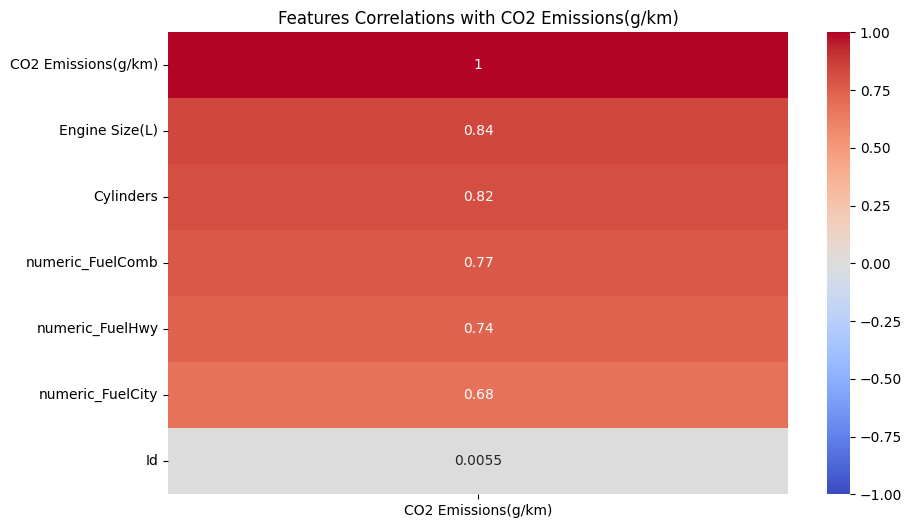

In [65]:
target_column = 'CO2 Emissions(g/km)'
corr_matrix = df_train.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

In [66]:
def color_red(val):
    if val > 0.80 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f'color: {color}'

In [67]:
df_train.drop(columns=['CO2 Emissions(g/km)']).corr().style.applymap(color_red)

,Id,Engine Size(L),Cylinders,numeric_FuelCity,numeric_FuelHwy,numeric_FuelComb
Id,1.000000,-0.005488,-0.004729,-0.000795,0.006058,0.002133
Engine Size(L),-0.005488,1.000000,0.938569,-0.535364,-0.627112,-0.630032
Cylinders,-0.004729,0.938569,1.000000,-0.519697,-0.614014,-0.613906
numeric_FuelCity,-0.000795,-0.535364,-0.519697,1.000000,0.634172,0.940246
numeric_FuelHwy,0.006058,-0.627112,-0.614014,0.634172,1.000000,0.859544
numeric_FuelComb,0.002133,-0.630032,-0.613906,0.940246,0.859544,1.000000


Because Engine Size and Cylinders are highly correlated
And FuelComb are highly correlated with FuelCity and FuelHwy so we are just going to take one of them
We are going to choose Engine Size and FuelComb as it have the highest correlation to CO2 Emission

In [68]:
df_train.drop(columns=['Cylinders', 'numeric_FuelCity', 'numeric_FuelHwy'], inplace=True)

In [69]:
numerical_features = df_train.select_dtypes(include='number').columns
len(numerical_features)

4

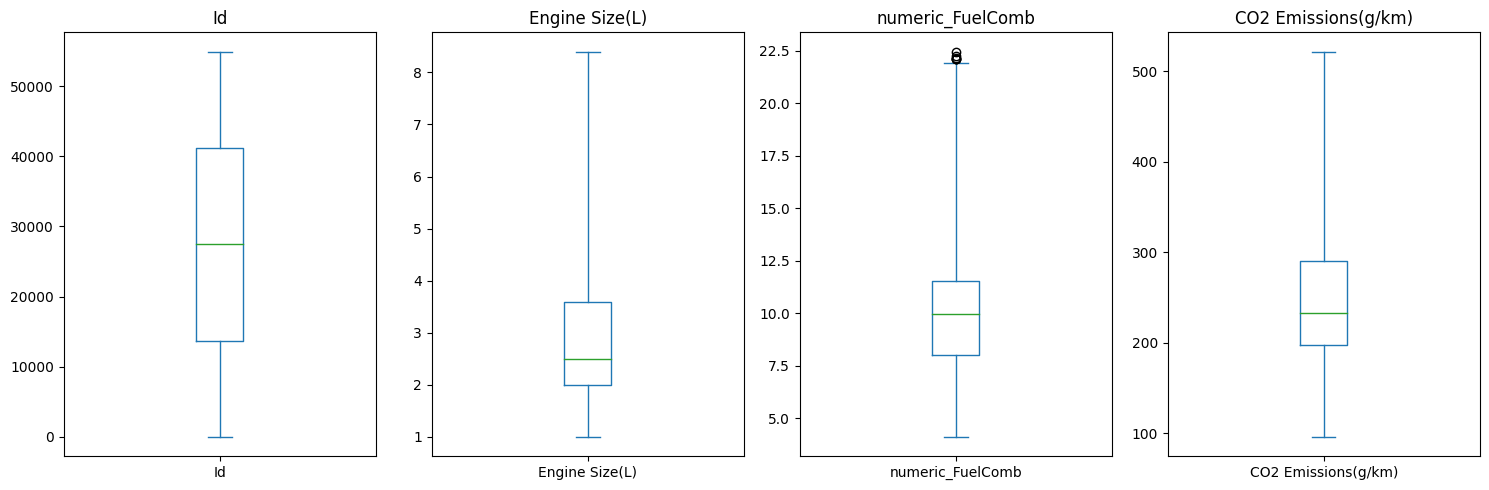

In [70]:
# boxplot for numerical features
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(numerical_features):
    df_train[col].plot.box(ax=axes[i], whis=3)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [71]:
df_train.skew()

Id                    -0.000357
Engine Size(L)         0.997141
numeric_FuelComb       0.903265
CO2 Emissions(g/km)    0.672291
dtype: float64

In [72]:
print(df_train.isnull().sum())
print(df_train.shape)

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Transmission           0
Fuel Type              0
numeric_FuelComb       0
CO2 Emissions(g/km)    0
dtype: int64
(45314, 8)


In [73]:
df_train.sample(10)

,Id,Make,Vehicle Class,Engine Size(L),Transmission,Fuel Type,numeric_FuelComb,CO2 Emissions(g/km)
44693,44694,BARUSU,SUV - SMALL,3.6,AV6,X,10.43,243
36809,36810,ASURA,COMPACT,2.4,AM8,Z,10.94,188
18826,18827,FOLD,MID-SIZE,2.7,AS6,X,9.59,273
4044,4045,NIRRAN,STATION WAGON - SMALL,1.6,AV8,Z,12.79,214
23844,23845,BMV,MID-SIZE,4.4,AS8,Z,6.77,292
26717,26718,FOLKSWA,COMPACT,2.0,AS6,Missing,10.40,197
27926,27927,CHEVO,SUV - STANDARD,5.3,A6,X,7.81,344
11033,11034,FOLD,Missing,2.5,AS6,X,8.80,261
3903,3904,BMV,SUBCOMPACT,3.0,AM7,Missing,8.13,328
30900,30901,LECUS,SUV - SMALL,2.5,AV6,X,11.79,171


In [74]:
# show row that is outlier to examine
Q1 = df_train['numeric_FuelComb'].quantile(0.25)
Q3 = df_train['numeric_FuelComb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train[(df_train['numeric_FuelComb'] < lower_bound) | (df_train['numeric_FuelComb'] > upper_bound)]

,Id,Make,Vehicle Class,Engine Size(L),Transmission,Fuel Type,numeric_FuelComb,CO2 Emissions(g/km)
24,25,GONDA,FULL-SIZE,1.5,AV,X,19.71,178
39,40,FOLD,Missing,2.0,AM6,E,19.43,107
62,63,GONDA,STATION WAGON - SMALL,1.8,AV7,X,19.62,139
104,105,MATSUDA,MID-SIZE,2.5,AS6,X,21.13,106
123,124,LECUS,MID-SIZE,3.5,AV10,Z,20.24,185
...,...,...,...,...,...,...,...,...
54502,54503,CHEVO,SUBCOMPACT,1.2,AV,X,17.10,179
54634,54635,FOLD,COMPACT,2.0,A6,X,20.13,144
54676,54677,DOGE,MID-SIZE,1.4,M6,X,18.99,138
54846,54847,ASURA,TWO-SEATER,3.5,AM9,Missing,18.14,263


As I think it can cause confussion so we will except the outliers

In [75]:
outliers = df_train[(df_train['numeric_FuelComb'] < lower_bound) | (df_train['numeric_FuelComb'] > upper_bound)]
df_train = df_train[~df_train.isin(outliers)]

df_train.sample(5)

,Id,Make,Vehicle Class,Engine Size(L),Transmission,Fuel Type,numeric_FuelComb,CO2 Emissions(g/km)
23227,23228.0,JIPU,SUV - SMALL,1.4,M6,X,8.91,209.0
4725,4726.0,TOYOTI,MID-SIZE,1.8,AV,X,13.44,174.0
9914,9915.0,FOLD,SUBCOMPACT,1.6,M6,X,10.62,194.0
24969,24970.0,FOLD,SPECIAL PURPOSE VEHICLE,2.0,AS8,E,11.38,211.0
51857,51858.0,TOYOTI,SUV - STANDARD,5.7,AS6,X,6.89,357.0


In [76]:
print(df_train.isnull().sum())
print(df_train.shape)

Id                     1149
Make                   1149
Vehicle Class          1149
Engine Size(L)         1149
Transmission           1149
Fuel Type              1149
numeric_FuelComb       1149
CO2 Emissions(g/km)    1149
dtype: int64
(45314, 8)


In [77]:
df_train.dropna(inplace=True)

In [78]:
print(df_train.isnull().sum())
print(df_train.shape)

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Transmission           0
Fuel Type              0
numeric_FuelComb       0
CO2 Emissions(g/km)    0
dtype: int64
(44165, 8)


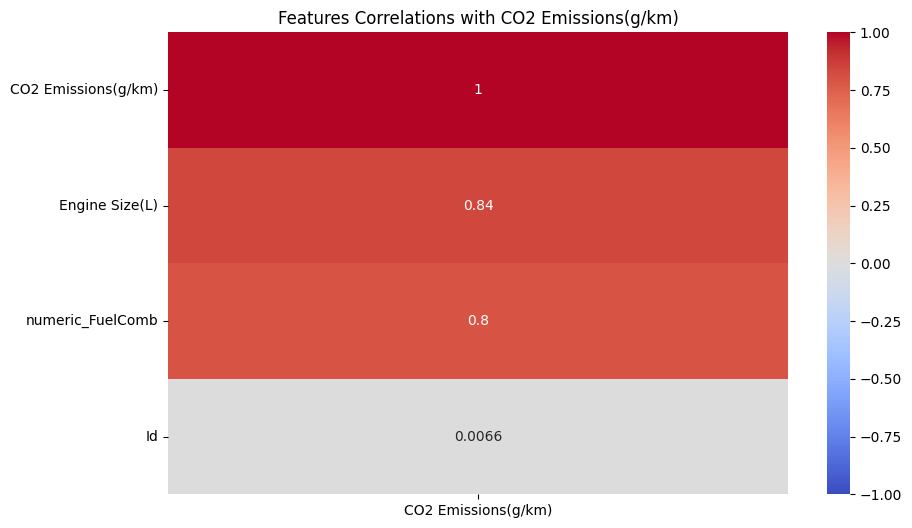

In [79]:
target_column = 'CO2 Emissions(g/km)'
corr_matrix = df_train.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

In [80]:
df_train.isnull().sum()

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Transmission           0
Fuel Type              0
numeric_FuelComb       0
CO2 Emissions(g/km)    0
dtype: int64

## Categorical Columns

In [81]:
categorical_features = df_train.select_dtypes(include='object').columns
categorical_features

Index(['Make', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [82]:
df_train.select_dtypes(include='object').describe().T

,count,unique,top,freq
Make,44165,21,FOLD,5856
Vehicle Class,44165,17,SUV - SMALL,9010
Transmission,44165,26,AS6,9780
Fuel Type,44165,6,X,26921


In [83]:
df_train['Make'].value_counts()

FOLD            5856
CHEVO           5275
BMV             4924
TOYOTI          2879
NIRRAN          2409
JIPU            2350
DOGE            2311
KIO             2051
RYUNDAI         1918
GONDA           1899
FOLKSWA         1799
LECUS           1627
MATSUDA         1609
CADILUXE        1522
BARUSU          1222
TOLVO           1138
MITSU            880
LAND CRAWLER     780
ASURA            692
FIAR             622
LAMBOGI          402
Name: Make, dtype: int64

In [84]:
df_train['Vehicle Class'].value_counts()

SUV - SMALL                 9010
COMPACT                     7166
MID-SIZE                    6493
SUV - STANDARD              3882
FULL-SIZE                   3259
PICKUP TRUCK - STANDARD     3134
SUBCOMPACT                  2926
STATION WAGON - SMALL       1845
Missing                     1632
TWO-SEATER                  1343
PICKUP TRUCK - SMALL        1078
MINIVAN                      579
MINICOMPACT                  526
SPECIAL PURPOSE VEHICLE      490
VAN - PASSENGER              399
STATION WAGON - MID-SIZE     292
VAN - CARGO                  111
Name: Vehicle Class, dtype: int64

In [85]:
df_train['Transmission'].value_counts()

AS6        9780
AS8        6864
M6         6223
A6         4292
AV         2339
A8         2275
M5         1609
AS10       1522
AM7        1216
Missing    1192
A9         1162
AV6         985
AV7         863
AM6         793
A5          769
AS9         567
A4          456
AV8         287
AS7         255
AS5         233
A10         126
AM8         123
AV10        111
M7           83
AM9          24
A7           16
Name: Transmission, dtype: int64

In [86]:
df_train['Fuel Type'].value_counts()

X          26921
Z          12650
E           2156
Missing     1548
D            882
N              8
Name: Fuel Type, dtype: int64

In [87]:
def Map_Fuel(data):
    fuel_type_dict = {
         'Z' : 'Premium Gasoline',
         'D' : 'Diesel',
         'X' : 'Regular Gasoline',
         'E' : 'Ethanol (E85)',
         'N' : 'Natural Gas',
        'Missing' : 'Missing',
    }
    
    data['Fuel Type'] = data['Fuel Type'].map(fuel_type_dict)

In [88]:
Map_Fuel(df_train)

In [89]:
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Transmission,Fuel Type,numeric_FuelComb,CO2 Emissions(g/km)
0,1.0,MITSU,SUV - SMALL,1.5,AV8,Regular Gasoline,10.87,208.0
2,3.0,MATSUDA,COMPACT,2.0,AS6,Regular Gasoline,11.56,170.0
4,5.0,TOYOTI,COMPACT,1.8,M6,Regular Gasoline,12.49,180.0
5,6.0,DOGE,MID-SIZE,2.4,A6,Regular Gasoline,10.49,216.0
7,8.0,LECUS,MID-SIZE,3.5,AS6,Regular Gasoline,9.13,221.0


In [90]:
df_train.isnull().sum()

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Transmission           0
Fuel Type              0
numeric_FuelComb       0
CO2 Emissions(g/km)    0
dtype: int64

In [91]:
df_train['Transmission'].value_counts()

AS6        9780
AS8        6864
M6         6223
A6         4292
AV         2339
A8         2275
M5         1609
AS10       1522
AM7        1216
Missing    1192
A9         1162
AV6         985
AV7         863
AM6         793
A5          769
AS9         567
A4          456
AV8         287
AS7         255
AS5         233
A10         126
AM8         123
AV10        111
M7           83
AM9          24
A7           16
Name: Transmission, dtype: int64

In [92]:
def classify_transmission(transmission):
    if pd.isna(transmission):
        return 'Missing'
    elif transmission.startswith('Missing'):
        return 'Missing'
    elif transmission.startswith('AM'):
        return 'AM Group'
    elif transmission.startswith('AV'):
        return 'AV Group'
    elif transmission.startswith('AS'):
        return 'AS Group'
    elif transmission.startswith('A'):
        return 'A Group' if transmission not in ['AM', 'AS', 'AV'] else 'AM/AS/AV Group'
    elif transmission.startswith('M'):
        return 'M Group'
    else:
        return 'Other Group'

# Apply the function to create a new 'Transmission Group' column
def Map_Transmission(data):
    data['Transmission Group'] = data['Transmission'].apply(classify_transmission)    

In [93]:
Map_Transmission(df_train)

In [94]:
df_train.sample(10)

,Id,Make,Vehicle Class,Engine Size(L),Transmission,Fuel Type,numeric_FuelComb,CO2 Emissions(g/km),Transmission Group
7100,7101.0,TOYOTI,SUV - SMALL,2.5,AV6,Regular Gasoline,8.89,130.0,AV Group
11946,11947.0,TOYOTI,SUV - STANDARD,3.5,AS6,Regular Gasoline,7.08,288.0,AS Group
18187,18188.0,FOLD,SUBCOMPACT,5.0,M6,Missing,6.73,331.0,M Group
37025,37026.0,MATSUDA,SUV - SMALL,2.0,M6,Regular Gasoline,10.40,185.0,M Group
12238,12239.0,RYUNDAI,COMPACT,1.6,M6,Regular Gasoline,12.39,186.0,M Group
17041,17042.0,BMV,SUBCOMPACT,4.4,M6,Premium Gasoline,12.68,339.0,M Group
8324,8325.0,BMV,SUV - SMALL,2.0,AS8,Premium Gasoline,9.77,229.0,AS Group
30109,30110.0,NIRRAN,MID-SIZE,2.5,Missing,Regular Gasoline,10.34,198.0,Missing
13269,13270.0,CADILUXE,COMPACT,3.6,AS8,Missing,7.09,303.0,AS Group
8007,8008.0,GONDA,COMPACT,1.5,Missing,Premium Gasoline,11.84,176.0,Missing


In [95]:
df_train['Transmission Group'].value_counts()

AS Group    19221
A Group      9096
M Group      7915
AV Group     4585
AM Group     2156
Missing      1192
Name: Transmission Group, dtype: int64

In [96]:
df_train.drop(columns=['Transmission'], inplace=True)

In [97]:
df_train.isnull().sum()

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Fuel Type              0
numeric_FuelComb       0
CO2 Emissions(g/km)    0
Transmission Group     0
dtype: int64

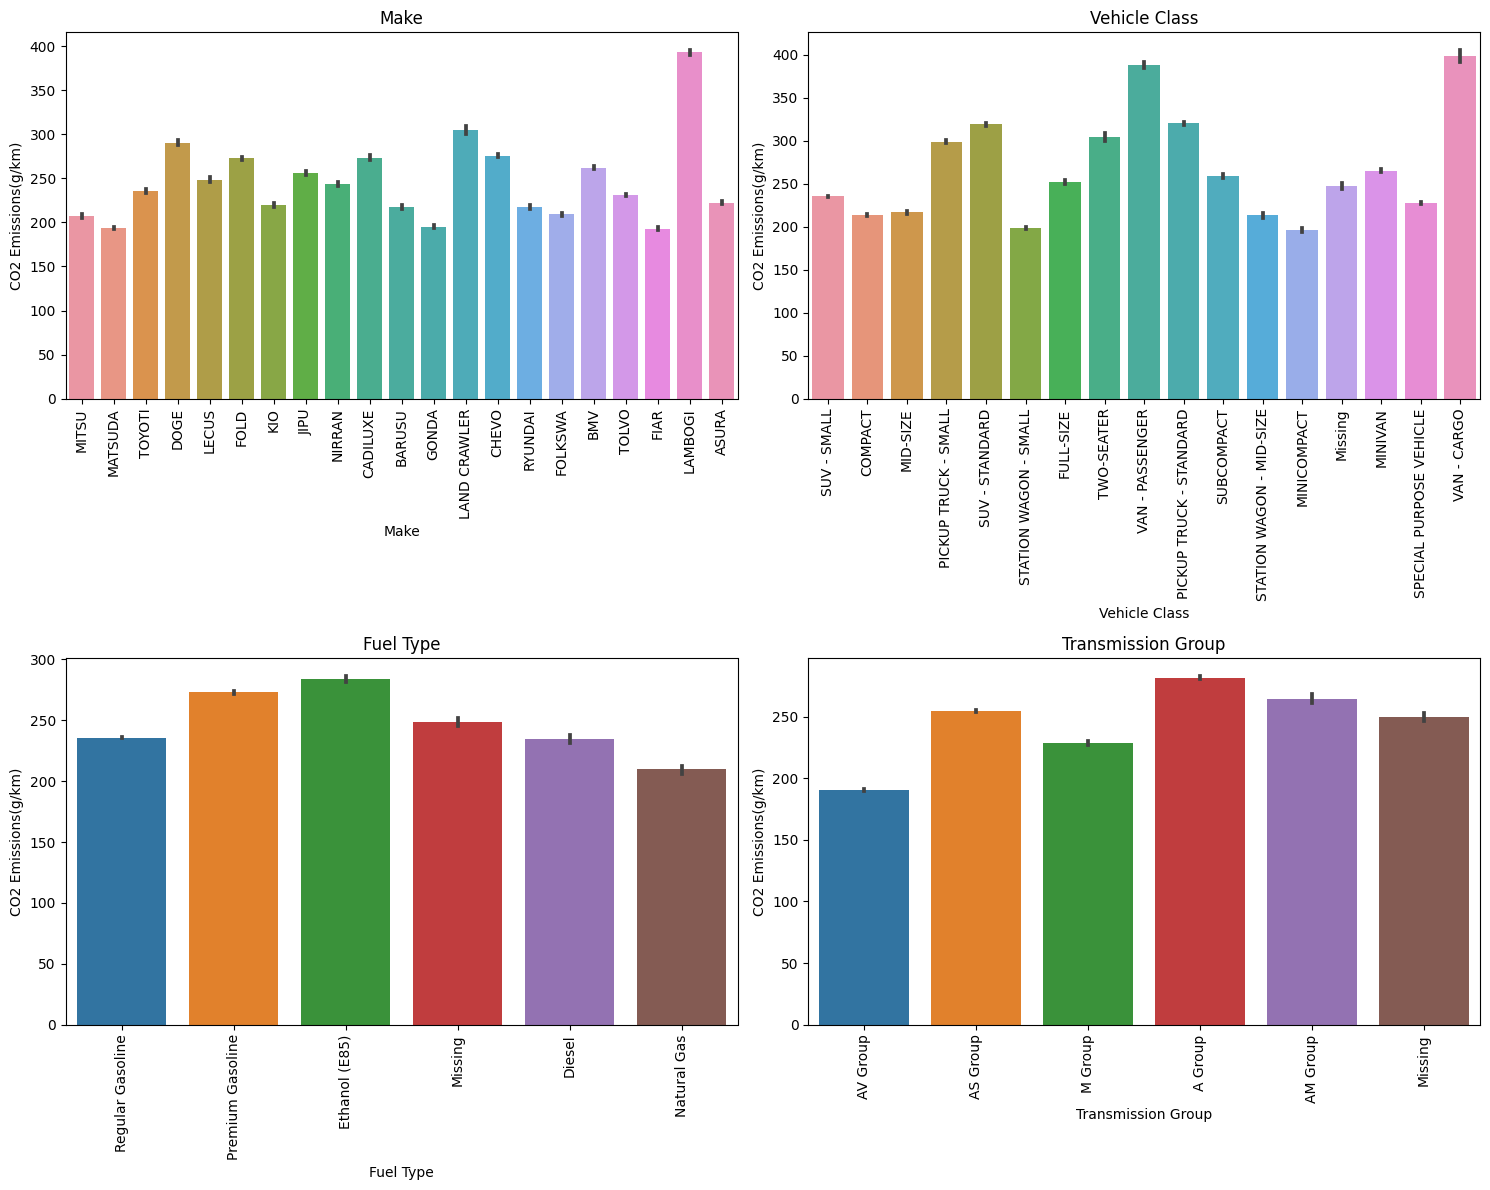

In [98]:
# barplot for categorical features
categorical_features = df_train.select_dtypes(include='object').columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Iterate through the columns and create bar plots
for i, col in enumerate(categorical_features):
    sns.barplot(ax=axes[i], data=df_train, x=col, y=target_column)
    axes[i].set_title(col)
    
    # Set tick positions and labels explicitly
    unique_categories = list(df_train[col].unique())
    tick_positions = range(len(unique_categories))
    
    axes[i].set_xticks(tick_positions)
    axes[i].set_xticklabels(labels=unique_categories, rotation=90)

plt.tight_layout()
plt.show()


So as we can see
- Lambogi produce most CO2 Emission maybe because it's a sport car obviously it engine runs heavily
- But on the vehicle class seen that VAN type of car produce the most CO2 Emission maybe because it occurence that is obviously a lot in the streets
- Based on the fuel type, ethanol is the worst especially they produce a lot of CO2 Emissions
- A group transmission produce worst Emission

In [99]:
from scipy.stats import f_oneway

anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-Value'])

# Perform ANOVA for each categorical feature
for feature in categorical_features:
    groups = [df_train[df_train[feature] == category][target_column] for category in df_train[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    # Append results to the DataFrame
    anova_results = anova_results.append({'Feature': feature, 'F-Statistic': f_stat, 'P-Value': p_value}, ignore_index=True)
anova_results

,Feature,F-Statistic,P-Value
0,Make,713.477773,0.0
1,Vehicle Class,1837.648015,0.0
2,Fuel Type,735.483994,0.0
3,Transmission Group,1628.194216,0.0


## Make Function

In [100]:
def Convert_DataType(data):
    data['Engine Size(L)'] = pd.to_numeric(data['Engine Size(L)'], errors='coerce').astype(float)
    data['Cylinders'] = pd.to_numeric(data['Cylinders'], errors='coerce').astype(float)
    data = data[data['Engine Size(L)'] != 0]
    data = data[data['Cylinders'] != 0]
    data.drop(columns=['Cylinders', 'numeric_FuelCity', 'numeric_FuelHwy'], inplace=True)

def Except_Outliers(data):
    # show row that is outlier to examine
    Q1 = data['numeric_FuelComb'].quantile(0.25)
    Q3 = data['numeric_FuelComb'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data['numeric_FuelComb'] < lower_bound) | (data['numeric_FuelComb'] > upper_bound)]
    data = data[~data.isin(outliers)]
    data.dropna(inplace=True)

def Cat_Features(data):
    categorical_features = data.select_dtypes(include='object').columns
    categorical_features
    Map_Fuel(data)
    Map_Transmission(data)
    data.drop(columns=['Transmission'], inplace=True)

In [101]:
def Apply_DataEDAPreprocessing(data):
    Convert_DataType(data)
    Except_Outliers(data)
    Cat_Features(data)

# Preprocessing

In [102]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [103]:
categorical_features = df_train.select_dtypes(include='object').columns
categorical_features

Index(['Make', 'Vehicle Class', 'Fuel Type', 'Transmission Group'], dtype='object')

In [104]:
df_train.head()

,Id,Make,Vehicle Class,Engine Size(L),Fuel Type,numeric_FuelComb,CO2 Emissions(g/km),Transmission Group
0,1.0,MITSU,SUV - SMALL,1.5,Regular Gasoline,10.87,208.0,AV Group
2,3.0,MATSUDA,COMPACT,2.0,Regular Gasoline,11.56,170.0,AS Group
4,5.0,TOYOTI,COMPACT,1.8,Regular Gasoline,12.49,180.0,M Group
5,6.0,DOGE,MID-SIZE,2.4,Regular Gasoline,10.49,216.0,A Group
7,8.0,LECUS,MID-SIZE,3.5,Regular Gasoline,9.13,221.0,AS Group


In [142]:
df_train.select_dtypes(include='object').describe().T

,count,unique,top,freq
Make,44165,21,FOLD,5856
Vehicle Class,44165,17,SUV - SMALL,9010
Fuel Type,44165,6,Regular Gasoline,26921
Transmission Group,44165,6,AS Group,19221


In [105]:
df_train.drop(columns=['Id'], inplace=True)

In [106]:
X = df_train.drop(columns=['CO2 Emissions(g/km)'])
y = df_train['CO2 Emissions(g/km)']
print(X.shape, y.shape)

(44165, 6) (44165,)


In [107]:
categorical_features = X.select_dtypes(include='object').columns
categorical_features

Index(['Make', 'Vehicle Class', 'Fuel Type', 'Transmission Group'], dtype='object')

In [108]:
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, prefix_sep='*', drop_first=True)
X_encoded.shape

(44165, 48)

# Train Test Split

In [109]:
from sklearn.model_selection import train_test_split,cross_validate

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled.shape

(35332, 48)

In [113]:
def Apply_Preprocessing(data):
    categorical_features = data.select_dtypes(include='object').columns
    categorical_features
    X = df_train.drop(columns=['CO2 Emissions(g/km)'])
    y = df_train['CO2 Emissions(g/km)']
    categorical_features = X.select_dtypes(include='object').columns
    categorical_features
    X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, prefix_sep='*', drop_first=True)
    X_encoded.shape
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    return data

# Model Building

## Multi Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
mlinear_model = LinearRegression()

In [116]:
mlinear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [117]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold

In [118]:
y_pred = mlinear_model.predict(X_test_scaled)
y_train_pred = mlinear_model.predict(X_train_scaled)

In [119]:
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Test Set: {rmse_test}")

# Calculate RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE for Training Set: {rmse_train}")

RMSE for Test Set: 24.89974916407779
RMSE for Training Set: 24.61856108811836


### Cross Validation

In [120]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
slm_scores_cv = pd.DataFrame(cross_validate(mlinear_model, X_encoded, y, cv=5, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {slm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {slm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
slm_scores_cv

Average R2 Score: 0.8600710715412878
Average -RMSE   : -24.69863859907533



,test_r2,test_neg_root_mean_squared_error
0,0.859367,-24.747835
1,0.855468,-25.351954
2,0.861252,-24.745500
3,0.861503,-24.381334
4,0.862765,-24.266570


## Lasso Regression

In [121]:
from sklearn.linear_model import Lasso, LassoCV

In [122]:
lasso_model = Lasso(random_state=42)

In [123]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [124]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [125]:
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Test Set: {rmse_test}")

# Calculate RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE for Training Set: {rmse_train}")

RMSE for Test Set: 25.754973226779
RMSE for Training Set: 25.61215975252931


### Cross Validation

In [126]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
lm_scores_cv = pd.DataFrame(cross_validate(lasso_model, X_encoded, y, cv=5, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {lm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {lm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
lm_scores_cv

Average R2 Score: 0.8131349105925061
Average -RMSE   : -28.54179505588691



,test_r2,test_neg_root_mean_squared_error
0,0.812449,-28.579418
1,0.807785,-29.236426
2,0.815639,-28.524448
3,0.814212,-28.238844
4,0.815591,-28.129838


# Apply Model

In [127]:
df_test = pd.read_csv('test.csv')

In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     23545 non-null  int64 
 1   Make                   23545 non-null  object
 2   Vehicle Class          23326 non-null  object
 3   Engine Size(L)         22913 non-null  object
 4   Cylinders              23039 non-null  object
 5   Transmission           23382 non-null  object
 6   Fuel Type              23324 non-null  object
 7   Fuel Consumption City  22861 non-null  object
 8   Fuel Consumption Hwy   22824 non-null  object
 9   Fuel Consumption Comb  22857 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [129]:
Apply_DataCleaning(df_test)
Apply_DataEDAPreprocessing(df_test)
Apply_Preprocessing(df_test)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,numeric_FuelCity,MeasureUnit_FuelCity,numeric_FuelHwy,MeasureUnit_FuelHwy,numeric_FuelComb,MeasureUnit_FuelComb,Transmission Group
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,Regular Gasoline,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS),14.200000,liters per 100 km,6.578947,liters per 100 km,10.770526,MPG (AS),AS Group
1,54939,BMV,COMPACT,2.0,4.0,Premium Gasoline,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS),9.100000,L/100 km,15.385101,mpg Imp.,11.928295,MPG (AS),A Group
2,54940,JIPU,SUV - SMALL,1.3,4.0,Regular Gasoline,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km,3.470118,mpg Imp.,12.820513,liters per 100 km,7.677795,liters per 100 km,A Group
3,54941,LECUS,SUV - SMALL,0.0,4.0,Premium Gasoline,NaN,26.43 MPG (AS),NaN,NaN,NaN,11.236548,MPG (AS),NaN,NaN,AS Group
4,54942,BARUSU,COMPACT,2.0,0.0,Premium Gasoline,11.36 km/L,39.79 mpg Imp.,8.04 L/100km,11.360000,km/L,14.085899,mpg Imp.,12.586654,L/100km,M Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,Regular Gasoline,NaN,13.33 km/L,8.98 L/100km,9.340650,NaN,13.330000,km/L,11.135857,L/100km,M Group
23541,78479,CHEVO,COMPACT,1.4,4.0,Regular Gasoline,27.04 MPG (AS),18.18 km per L,0.73 L/10km,4.887404,MPG (AS),18.180000,km per L,10.869072,L/10km,M Group
23542,78480,KIO,SUV - SMALL,0.0,4.0,Regular Gasoline,11.60 L/100km,8.40 liters per 100 km,9.84 km per L,11.600000,L/100km,11.904762,liters per 100 km,11.737143,km per L,AS Group
23543,78481,JIPU,SUV - SMALL,2.4,4.0,Regular Gasoline,9.52 km/L,0.84 L/10km,0.96 L/10km,9.520000,km/L,11.904762,L/10km,10.593143,L/10km,A Group


In [130]:
missing_comb = df_test['numeric_FuelComb'].isna()
df_test.loc[missing_comb, 'numeric_FuelComb'] = (df_test['numeric_FuelCity']*0.55) + (df_test['numeric_FuelHwy']*0.45)

In [132]:
mean_value = df_test['numeric_FuelComb'].mean()
df_test['numeric_FuelComb'] = df_test['numeric_FuelComb'].fillna(mean_value)

In [133]:
df_test.isnull().sum()

Id                          0
Make                        0
Vehicle Class               0
Engine Size(L)              0
Cylinders                   0
Fuel Type                   0
Fuel Consumption City     684
Fuel Consumption Hwy      721
Fuel Consumption Comb     688
numeric_FuelCity          103
MeasureUnit_FuelCity     1041
numeric_FuelHwy           103
MeasureUnit_FuelHwy      1067
numeric_FuelComb            0
MeasureUnit_FuelComb     1037
Transmission Group          0
dtype: int64

In [151]:
df_test = df_test[['Make', 'Vehicle Class', 'Engine Size(L)', 'Fuel Type', 'numeric_FuelComb', 'Transmission Group']]
df_test.head()

,Make,Vehicle Class,Engine Size(L),Fuel Type,numeric_FuelComb,Transmission Group
0,FOLD,PICKUP TRUCK - STANDARD,5.0,Regular Gasoline,10.77,AS Group
1,BMV,COMPACT,2.0,Premium Gasoline,11.93,A Group
2,JIPU,SUV - SMALL,1.3,Regular Gasoline,7.68,A Group
3,LECUS,SUV - SMALL,0.0,Premium Gasoline,9.60,AS Group
4,BARUSU,COMPACT,2.0,Premium Gasoline,12.59,M Group


In [152]:
df_test = df_test.round(2)
df_test.sample(5)

,Make,Vehicle Class,Engine Size(L),Fuel Type,numeric_FuelComb,Transmission Group
4974,FOLKSWA,MID-SIZE,1.8,Regular Gasoline,11.69,M Group
22508,BARUSU,MID-SIZE,3.6,Regular Gasoline,11.45,AV Group
468,CHEVO,PICKUP TRUCK - STANDARD,4.3,Regular Gasoline,3.98,A Group
4542,MITSU,SUV - SMALL,2.4,Regular Gasoline,8.17,AV Group
21215,CHEVO,Missing,6.2,Premium Gasoline,14.60,AS Group


In [153]:
df_test.isnull().sum()

Make                  0
Vehicle Class         0
Engine Size(L)        0
Fuel Type             0
numeric_FuelComb      0
Transmission Group    0
dtype: int64

In [154]:
df_test.select_dtypes(include='object').describe().T

,count,unique,top,freq
Make,23545,21,FOLD,3081
Vehicle Class,23545,17,SUV - SMALL,4625
Fuel Type,23545,6,Regular Gasoline,14432
Transmission Group,23545,6,AS Group,10276


In [155]:
categorical_features = df_test.select_dtypes(include='object').columns
categorical_features

Index(['Make', 'Vehicle Class', 'Fuel Type', 'Transmission Group'], dtype='object')

In [156]:
predict_encoded = pd.get_dummies(df_test, columns=categorical_features, prefix=categorical_features, prefix_sep='*', drop_first=True)
predict_encoded.shape

(23545, 48)

In [157]:
predict_scaled = scaler.fit_transform(predict_encoded)

In [158]:
predict_scaled.shape

(23545, 48)

In [159]:
predict_scaled

array([[ 1.51907327,  0.39409756, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681],
       [-0.45334843,  0.78406221, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681],
       [-0.91358016, -0.64468756, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681],
       ...,
       [-1.76829623,  0.72018869, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681],
       [-0.19035887,  0.33358581, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681],
       [ 1.71631544,  0.41762991, -0.17310403, ..., -0.35460834,
        -0.4648029 , -0.16349681]])

In [160]:
predictions = mlinear_model.predict(predict_scaled)

In [161]:
df_test["CO2 Emissions(g/km)"] = predictions

In [162]:
df_test.head()

,Make,Vehicle Class,Engine Size(L),Fuel Type,numeric_FuelComb,Transmission Group,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,5.0,Regular Gasoline,10.77,AS Group,325.360892
1,BMV,COMPACT,2.0,Premium Gasoline,11.93,A Group,218.886078
2,JIPU,SUV - SMALL,1.3,Regular Gasoline,7.68,A Group,235.894895
3,LECUS,SUV - SMALL,0.0,Premium Gasoline,9.60,AS Group,184.597440
4,BARUSU,COMPACT,2.0,Premium Gasoline,12.59,M Group,221.687678


In [164]:
ambil_id = pd.read_csv('test.csv')

In [165]:
df_test.insert(0, 'Id', ambil_id['Id'])
df_test

,Id,Make,Vehicle Class,Engine Size(L),Fuel Type,numeric_FuelComb,Transmission Group,CO2 Emissions(g/km)
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,Regular Gasoline,10.77,AS Group,325.360892
1,54939,BMV,COMPACT,2.0,Premium Gasoline,11.93,A Group,218.886078
2,54940,JIPU,SUV - SMALL,1.3,Regular Gasoline,7.68,A Group,235.894895
3,54941,LECUS,SUV - SMALL,0.0,Premium Gasoline,9.60,AS Group,184.597440
4,54942,BARUSU,COMPACT,2.0,Premium Gasoline,12.59,M Group,221.687678
...,...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,Regular Gasoline,11.14,M Group,235.135888
23541,78479,CHEVO,COMPACT,1.4,Regular Gasoline,10.87,M Group,196.486277
23542,78480,KIO,SUV - SMALL,0.0,Regular Gasoline,11.74,AS Group,175.068269
23543,78481,JIPU,SUV - SMALL,2.4,Regular Gasoline,10.59,A Group,244.222329


In [166]:
df_test = df_test[['Id', 'CO2 Emissions(g/km)']]
df_test.head()

,Id,CO2 Emissions(g/km)
0,54938,325.360892
1,54939,218.886078
2,54940,235.894895
3,54941,184.597440
4,54942,221.687678


In [168]:
df_test['CO2 Emissions(g/km)'] = df_test['CO2 Emissions(g/km)'].astype('int64')

In [173]:
df_test.to_csv("Data Slayer - MultiRegModel (RMSE 0.24).csv", index=False)

In [174]:
df_submission = pd.read_csv('Data Slayer - MultiRegModel (RMSE: 0.24).csv')
df_submission

,Id,CO2 Emissions(g/km)
0,54938,325
1,54939,218
2,54940,235
3,54941,184
4,54942,221
...,...,...
23540,78478,235
23541,78479,196
23542,78480,175
23543,78481,244
